In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd  # Import pandas

# Specify the file path
file_path = '/content/drive/My Drive/TotalCasas/Total-Casas.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

      Segmento Desarrollador              Proyecto Prototipo Categoría  \
0  Residencial     Acrópolis               Mykonos         B     2N 3R   
1  Residencial        Lujamí                Mattía     Baham     2N 3R   
2  Residencial       Imperio   Robles Juriquilla I    Acacia     2N 3R   
3  Residencial       Imperio  Robles Juriquilla II    Acacia     2N 3R   
4  Residencial       Imperio   Robles Juriquilla I     Maple     2N 3R   

  Tipo de Unidad  Terreno (m2 T)  Construcción (m2 C)  m2 C / m2 T    $ Lista  \
0     2N 3R 2.5B           93.00               109.32     1.175484  2160500.0   
1     2N 3R 2.5B          110.00               123.12     1.119273  2730000.0   
2   2N 3R E 2.5B          108.89               122.54     1.125356  2750000.0   
3   2N 3R E 2.5B          108.89               122.54     1.125356  2750000.0   
4     2N 3R 2.5B          108.89               126.73     1.163835  2800000.0   

   ...  Total Unidades  Ventas  Inventario  Abs. Hist  (U / Mes)  \


In [ ]:
!pip install seaborn

In [15]:
# Create dashboard-Characteristics
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn's default style
sns.set_theme()

fig = plt.figure(figsize=(30, 50))


<Figure size 3000x5000 with 0 Axes>

Text(0.5, 0, 'Number of Units')

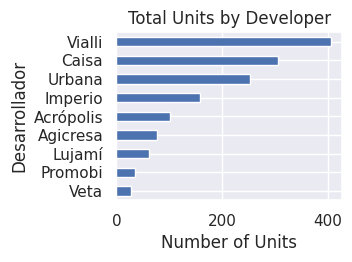

In [16]:
plt.subplot(2, 2, 1)
# Replace 'df' with 'data'
developer_units = data.groupby('Desarrollador')['Total Unidades'].sum().sort_values(ascending=True)
developer_units.plot(kind='barh')
plt.title('Total Units by Developer')
plt.xlabel('Number of Units')

Text(0.5, 0, 'Price ($ List)')

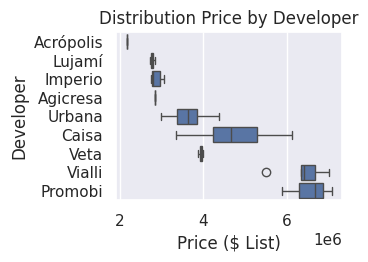

In [17]:
# 2. Price Distribution
plt.subplot(2, 2, 2)
sns.boxplot(y='Desarrollador', x='$ Lista', data=data)  # Change df to data
plt.title('Distribution Price by Developer')
plt.ylabel('Developer')
plt.xlabel('Price ($ List)')

Text(0.5, 1.0, 'Sales vs Inventory by Developer')

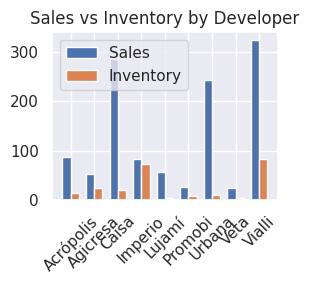

In [19]:
# 3. Sales vs Inventory
plt.subplot(2, 2, 3)
# Replace 'df' with 'data' to use the DataFrame loaded earlier
df_summary = data.groupby('Desarrollador').agg({
    'Ventas': 'sum',
    'Inventario': 'sum'
}).reset_index()

x = range(len(df_summary['Desarrollador']))
width = 0.35

plt.bar(x, df_summary['Ventas'], width=width, label='Sales')
plt.bar([i + width for i in x], df_summary['Inventario'], width, label='Inventory')
plt.xticks([i + width/2 for i in x], df_summary['Desarrollador'], rotation=45)
plt.legend()
plt.title('Sales vs Inventory by Developer')

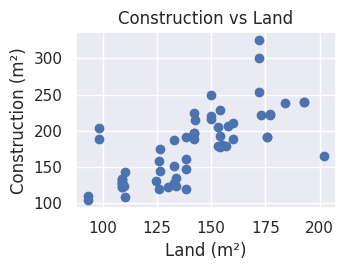

In [20]:
# 4. Construction vs Land Area
plt.subplot(2, 2, 4)
# Replace 'df' with 'data' to access the correct DataFrame
plt.scatter(data['Terreno (m2 T)'], data['Construcción (m2 C)'])
plt.xlabel('Land (m²)')
plt.ylabel('Construction (m²)')
plt.title('Construction vs Land')


plt.tight_layout()
plt.show()

In [21]:
print('\
Statistics:')
print('Total de Projectos:', len(data))  # Change df to data
print('Average Precio:', data['$ Lista'].mean())  # Change df to data
print('Total Unidades:', data['Total Unidades'].sum())  # Change df to data
print('Total Ventas:', data['Ventas'].sum())  # Change df to data
print('Total Inventario:', data['Inventario'].sum())  # Change df to data


Statistics:
Total de Projectos: 60
Average Precio: 4352872.742857143
Total Unidades: 1428
Total Ventas: 1186
Total Inventario: 242
